In [ ]:
# you need to install this module to run the notebook
!pip install pandas-datareader

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from pandas_datareader import data
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
from tftk.data import TsData

/Users/jasonhu/anaconda3/envs/tftk/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
goog = data.DataReader('GOOG', start='2010', end='2018', data_source='yahoo')
goog.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735
2010-01-08,300.498657,293.455048,294.894653,299.885956,9483900.0,299.885956
2010-01-11,301.101410,295.910858,301.101410,299.432648,14479800.0,299.432648
2010-01-12,297.963165,292.902130,297.709106,294.137512,9742900.0,294.137512
2010-01-13,293.091431,285.878448,287.168610,292.448822,13041800.0,292.448822
2010-01-14,295.990540,290.316833,290.859772,293.823669,8511900.0,293.823669


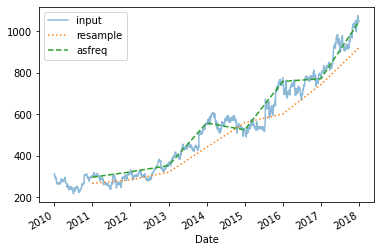

In [3]:
goog.Close.plot(alpha=0.5, style='-')
goog.Close.resample('BA').mean().plot(style=':')
goog.Close.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'])

In [4]:
goog.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999786,0.999870,0.999824,-0.598692,0.999824
Low,0.999786,1.000000,0.999795,0.999871,-0.604253,0.999871
Open,0.999870,0.999795,1.000000,0.999663,-0.600341,0.999663
Close,0.999824,0.999871,0.999663,1.000000,-0.602105,1.000000
Volume,-0.598692,-0.604253,-0.600341,-0.602105,1.000000,-0.602105
Adj Close,0.999824,0.999871,0.999663,1.000000,-0.602105,1.000000


In [5]:
ts_data = TsData.make_ts_features(goog,
                                  predictor_labels=['High', 'Low', 'Open', 'Close', 'Volume'],
                                  target_label=['Close'],
                                  goback_steps=5,
                                  period_per_step=1, 
                                  forecast_period=3,
                                  auto_feature_select=True)

/Users/jasonhu/Documents/GitHub/timeseries-toolkit/src/tftk/data.py:203: UserWarning: The time interval of your index is inconsistent ,you need to resample the data so that it satisfies the requirements
  warnings.warn(


In [6]:
ts_data.predictor_labels

['Close', 'Volume']

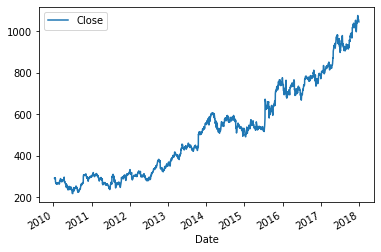

In [7]:
ts_data.ts_target.plot()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression().fit(ts_data.ts_features, ts_data.ts_target)

In [10]:
predict = reg.predict(ts_data.ts_features)

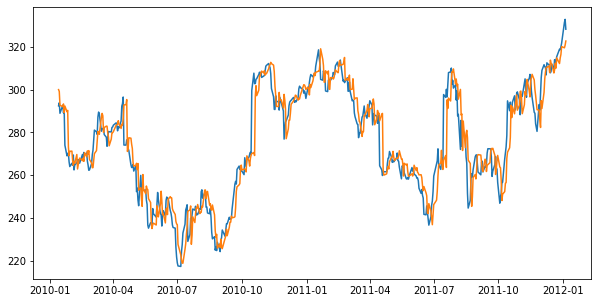

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts_data.ts_target.iloc[:500])
ax.plot(ts_data.ts_target.iloc[:500].index, predict[:500])

In [12]:
from tftk.naive_regressor import Persist

In [13]:
ts_data = TsData.make_ts_features(goog,
                                  predictor_labels=['Close'],
                                  target_label=['Close'],
                                  goback_steps=5,
                                  forecast_period=3,
                                  period_per_step=1, 
                                  auto_feature_select=False)

/Users/jasonhu/Documents/GitHub/timeseries-toolkit/src/tftk/data.py:203: UserWarning: The time interval of your index is inconsistent ,you need to resample the data so that it satisfies the requirements
  warnings.warn(


In [14]:
predict = Persist.predict(ts_data.ts_features)

In [15]:
rmse = Persist.score(ts_data.ts_target.Close, predict)
rmse

13.387864464213685

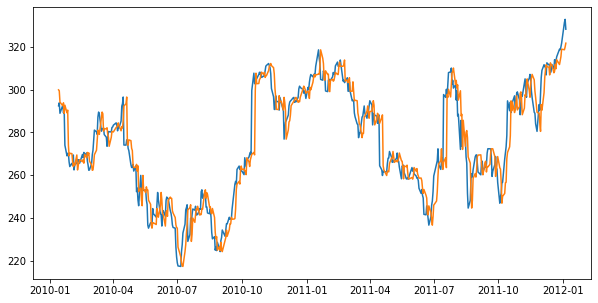

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts_data.ts_target.iloc[:500])
ax.plot(ts_data.ts_target.iloc[:500].index, predict[:500])